In [110]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
from dslab import adguide #source: https://github.com/adophobr/PhotonicIntegratedCircuits/blob/main/jupyter/utils/dslab.py
import warnings
sys.path.append('C:\\Program Files\\Lumerical\\v221\\api\\python')
sys.path.append('C:\\Program Files\\Lumerical\\v221\\api\\python\\lumapi.py')

In [111]:
from IPython.core.display import HTML
from IPython.core.pylabtools import figsize
from IPython.display import display, Math   

HTML("""
<style>
.output_png{
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

figsize(8,4)

In [112]:
warnings.filterwarnings("ignore", category=SyntaxWarning)
import lumapi
varApi = lumapi.MODE()

Units

In [113]:
um = 1e-6
nm = 1e-9

Materials

In [114]:
materialClad = "SiO2 (Glass) - Palik"
materialSi = "Si (Silicon) - Dispersive & Lossless"

# Add material
matname = materialSi
'''matReturn = varApi.getmaterial(materialSi)
if (varApi.findstring(matReturn, 'cannot be found') != -1):
    varApi.addmaterial("Lorentz")
    varApi.setmaterial('New material 1', "Name", matname)
    varApi.setmaterial(matname, "Name", matname)
    varApi.setmaterial(matname, "Permittivity", 7.9837492)
    varApi.setmaterial(matname, "Lorentz Linewidth", 1e8)
    varApi.setmaterial(matname, "Lorentz Resonance", 3.93282466e+15)
    varApi.setmaterial(matname, "Lorentz Permittivity", 3.68799143)
    varApi.setmaterial(matname, "color", np.array([0.85, 0, 0, 1])) # red'''

varApi.addmaterial("Lorentz")
varApi.setmaterial('New material 1', "Name", matname)
varApi.setmaterial(matname, "Permittivity", 7.9837492)
varApi.setmaterial(matname, "Lorentz Linewidth", 1e8)
varApi.setmaterial(matname, "Lorentz Resonance", 3.93282466e+15)
varApi.setmaterial(matname, "Lorentz Permittivity", 3.68799143)
varApi.setmaterial(matname, "color", np.array([0.85, 0, 0, 1])) # red
#materialSi = 'materialSi'


In [115]:
'''
matname = materialClad
matReturn = varApi.getmaterial(materialClad)
if (varApi.findstring(matReturn, 'cannot be found') != -1):
    newmaterial = varApi.addmaterial("Lorentz")
    varApi.setmaterial(matname, "name", matname)
    varApi.setmaterial(matname, "Permittivity", 2.119881)
    varApi.setmaterial(matname, "Lorentz Linewidth", 1e10)
    varApi.setmaterial(matname, "Lorentz Resonance", 3.309238e+13)
    varApi.setmaterial(matname, "Lorentz Permittivity", 49.43721)
    varApi.setmaterial(matname, "color", np.array([0.5, 0.5, 0.5, 1])) # grey'''

'\nmatname = materialClad\nmatReturn = varApi.getmaterial(materialClad)\nif (varApi.findstring(matReturn, \'cannot be found\') != -1):\n    newmaterial = varApi.addmaterial("Lorentz")\n    varApi.setmaterial(matname, "name", matname)\n    varApi.setmaterial(matname, "Permittivity", 2.119881)\n    varApi.setmaterial(matname, "Lorentz Linewidth", 1e10)\n    varApi.setmaterial(matname, "Lorentz Resonance", 3.309238e+13)\n    varApi.setmaterial(matname, "Lorentz Permittivity", 49.43721)\n    varApi.setmaterial(matname, "color", np.array([0.5, 0.5, 0.5, 1])) # grey'

Dimensions

In [116]:
nr = 3.476 # wl @1550nm
nc = 1.444 # wl @1550nm
lambda0 = 1550*nm
Wm = 7*um
k0 = 2*np.pi/lambda0
sigmaTE = 0 #ref: soldano
sigmaTM = 1 #ref: soldano
We= Wm + (lambda0/np.pi) * ((nc/nr)**(2*sigmaTE)) * ((nr**2 - nc**2)**(-0.5))
Lpi = (4*nr*We**2)/(3*lambda0) #soldano

In [117]:
betaTE, neffTE,kfTE, alsTE, alcTE, MTE = adguide(nr,nc,nc,lambda0,Wm/2,'TE')

Parameters

In [118]:
#box
Wm = 7*um
N = 2
L = 58*um#3/N*Lpi_num/4
#tapers
taper_large_tip = 1.5*um
taper_length = 15*um
#slabs 
width = 450*nm
height = 220*nm
length = 5*um
cband = True
We = Wm + (lambda0/np.pi)* ((nc/nr)**(2*sigmaTE)) *(nr**2 - nc**2)**(-0.5)
print(L)

5.8e-05


In [119]:
# C band simulation: 1520 ~ 1575 nm
# L band simulation: 1555 ~ 1635 nm
if cband:
    wl_start = 1520*nm
    wl_stop = 1575*nm
else:
    wl_start = 1555*nm
    wl_stop = 1635*nm

In [156]:
varApi.switchtolayout()
varApi.deleteall()
varApi.cleardcard

<bound method Lumerical.__init__.<locals>.<lambda>.<locals>.<lambda> of <lumapi.MODE object at 0x000001F2D491FB60>>

In [157]:
varApi.addstructuregroup()
dev_layer = 'GDS_LAYER_35:4'
varApi.set('name', dev_layer)

Box

In [158]:
varApi.addrect()
varApi.addtogroup(dev_layer)
varApi.set('name','box')
varApi.set('x',0)
varApi.set('x span', L)
varApi.set('y',0)
varApi.set('y span', Wm)
varApi.set('z',height/2)
varApi.set('z span', height)
varApi.set('material', materialSi)

Tapers

In [159]:
for i in range(4):
    varApi.addobject('linear_taper')
    varApi.set('name', f'taper port {str(i+1)}')
    varApi.set('thickness', height)
    varApi.set('angle_side', 90)
    varApi.set('width_l', width)
    varApi.set('width_r', taper_large_tip)
    varApi.set('len', taper_length)
    varApi.set('material', materialSi)
    varApi.set('x', -(varApi.getnamed(f'{dev_layer}::box', 'x max') + taper_length/2))
    varApi.set('y', Wm/6)
    varApi.set('z', height/2)

In [160]:
#adjusting port 2
varApi.select(f'{dev_layer}::taper port 2')
varApi.set('width_l', taper_large_tip)
varApi.set('width_r', width)
varApi.set('x', varApi.getnamed(f'{dev_layer}::box', 'x max') + taper_length/2)
varApi.set('y', Wm/6)

##adjusting port 3
varApi.select(f'{dev_layer}::taper port 3')
varApi.set('width_l', taper_large_tip)
varApi.set('width_r', width)
varApi.set('x', varApi.getnamed(f'{dev_layer}::box', 'x max') + taper_length/2)
varApi.set('y', -Wm/6)
#adjusting port 4

varApi.select(f'{dev_layer}::taper port 4')
varApi.set('y', -Wm/6)

Waveguides

In [161]:
for i in range(4):
    varApi.addrect()
    varApi.addtogroup(dev_layer)
    varApi.set('name', f'port {str(i+1)}')
    varApi.set('x', -(varApi.getnamed(f'{dev_layer}::box', 'x max') + taper_length + length/2))
    varApi.set('x span', length)
    varApi.set('y', Wm/6)
    varApi.set('y span', width)
    varApi.set('z', height/2)
    varApi.set('z span', height)
    varApi.set('material', materialSi)

In [162]:
#adjusting
varApi.select(f'{dev_layer}::port 2')
varApi.set('x', (varApi.getnamed(f'{dev_layer}::box', 'x max') + taper_length + length/2))
varApi.set('y', Wm/6)

varApi.select(f'{dev_layer}::port 3')
varApi.set('x', (varApi.getnamed(f'{dev_layer}::box', 'x max') + taper_length + length/2))
varApi.set('y', -Wm/6)

varApi.select(f'{dev_layer}::port 4')
varApi.set('y',-Wm/6)

Adding solver

In [163]:
varApi.addvarfdtd()
varApi.set('simulation time', 10000*1e-15)
#background material
varApi.set('background material', materialClad)

bound_x_offset = 0.5*um
bound_y_offset = 2*um
bound_z_offset = 0.5*um

port_y_span = 2*um
port_z_span = 2*um
#dimensions:

varApi.set('x',0)
varApi.set('x span', L + 2*taper_length + length +  bound_x_offset)
varApi.set('y', 0)
varApi.set('y span', (Wm + 2*bound_y_offset)*1.2)
varApi.set('z', height/2)
varApi.set('z span', port_z_span+bound_z_offset)

varApi.set('bandwidth', 'broadband')
varApi.set('number of test points', 4)


In [164]:
#test points
test_points= np.array([[-L/2-taper_length/2, Wm*0.6], [-L/2-taper_length/2, -Wm*0.6] , [L*0.4, -Wm/6], [L*0.4, Wm/6]])
varApi.set('mesh accuracy', 2)
varApi.set('x0', -(L/2))
varApi.set('test points', test_points)


The simulation was diverging, we can change some software features as its said in:
https://optics.ansys.com/hc/en-us/articles/11277217507603-Troubleshooting-diverging-simulations-in-FDTD

In [165]:
#boundary conditions
varApi.set('x min bc', 'PML')
varApi.set('x max bc', 'PML')
varApi.set('y min bc', 'PML')
varApi.set('y max bc', 'PML')
varApi.set('z min bc', 'Symmetric')
varApi.set('z max bc', 'PML')

'''#indicated changes
varApi.set('dt stability factor', 0.9)
#custom PML setup
varApi.set('PML type', 'stretched coordinate PML')
varApi.set('PML profile', 4)
varApi.set('PML layers', 40)
varApi.set('PML kappa', 10)
varApi.set('PML sigma', 1)
varApi.set('PML alpha', 10)'''

"#indicated changes\nvarApi.set('dt stability factor', 0.9)\n#custom PML setup\nvarApi.set('PML type', 'stretched coordinate PML')\nvarApi.set('PML profile', 4)\nvarApi.set('PML layers', 40)\nvarApi.set('PML kappa', 10)\nvarApi.set('PML sigma', 1)\nvarApi.set('PML alpha', 10)"

Source

In [166]:
varApi.addmodesource()
varApi.set('x', -(L/2 + taper_length  + length/2))
varApi.set('y', Wm/6)
varApi.set('y span', taper_large_tip)
varApi.set('wavelength start', wl_start)
varApi.set('wavelength stop', wl_stop)
varApi.set('mode selection', 'fundamental mode')

In [167]:
varApi.addmodesource()
varApi.set('x', -(L/2 + taper_length + length/2))
varApi.set('y',-Wm/6)
varApi.set('y span', taper_large_tip)
varApi.set('wavelength start', wl_start)
varApi.set('wavelength stop', wl_stop)
varApi.set('mode selection', 'fundamental mode')

Monitors    

In [168]:
# z normal field profile
varApi.addprofile()
varApi.set('name', 'z normal field profile')
varApi.set('monitor type', '2D Z-normal')
varApi.set('x',0)
varApi.set('x span', varApi.getnamed('varFDTD', 'x span') +  varApi.getnamed('varFDTD', 'x span')*0.1)
varApi.set('y',0)
varApi.set('y span', varApi.getnamed('varFDTD', 'y span') + varApi.getnamed('varFDTD', 'y span')*0.1)
varApi.set('z', height/2)

In [169]:
# input field profile
varApi.addprofile()
varApi.set('name', 'input profile 1')
varApi.set('monitor type', '2D X-normal')
varApi.set('x', -(L/2 + taper_length + length/2))
varApi.set('y', Wm/6)
varApi.set('y span', 2*um)
varApi.set('z',height/2)
# input field profile
varApi.addprofile()
varApi.set('name', 'input profile 2')
varApi.set('monitor type', '2D X-normal')
varApi.set('x', -(L/2 + taper_length + length/2))
varApi.set('y', -Wm/6)
varApi.set('y span', 2*um)
varApi.set('z', height/2)

In [170]:
#output fields profiles
#port 2
varApi.addprofile()
varApi.set('name', 'output profile port 2')
varApi.set('monitor type', '2D X-normal')
varApi.set('x', (L/2 + taper_length*1.1))
varApi.set('y', Wm/6)
varApi.set('y span', 2*um)
varApi.set('z', height/2)

#port 3
varApi.addprofile()
varApi.set('name', 'output profile port 3')
varApi.set('monitor type', '2D X-normal')
varApi.set('x', (L/2 + taper_length*1.1))
varApi.set('y', -Wm/6)
varApi.set('y span', 2*um)
varApi.set('z', height/2)

In [171]:
varApi.save('MMIvar')
varApi.run()

In [172]:
#field profile
E = varApi.getresult('z normal field profile', 'E')

x = E['x']
x = x[:,0]/um
y = E['y']
y = y[:,0]/um
z = E['z']  

E = E['E']

Ex = E[:,:,0,:,0]
Ey = E[:,:,0,:,1]
Ez = E[:,:,0,:,2]

Emag = np.sqrt(np.abs(Ex)**2 + np.abs(Ey)**2 + np.abs(Ez)**2)

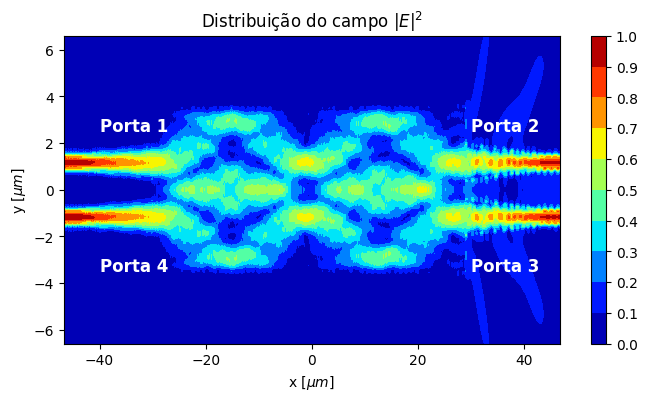

In [173]:
plt.figure()
mycmap = plt.get_cmap('jet')

v = np.linspace(0, 1, 11, endpoint=True)

plt.contourf(x,y,np.transpose(Emag[:,:,0]), v, cmap=mycmap)
plt.colorbar(ticks=v)
plt.title(r'Distribuição do campo $|E|^2$', fontsize = 12)
plt.ylabel('y $[\mu m]$', fontsize = 10)
plt.xlabel('x $[\mu m]$', fontsize = 10)

plt.text(-40,2.5, 'Porta 1', fontsize = 12, fontweight = 'bold', color='w')
plt.text(-40,-3.5, 'Porta 4', fontsize = 12, fontweight = 'bold', color='w')
plt.text(30,2.5,'Porta 2', fontsize = 12, fontweight = 'bold', color='w')
plt.text(30,-3.5,'Porta 3', fontsize = 12, fontweight = 'bold', color='w')
plt.savefig('VAR Distribuição do campo E')

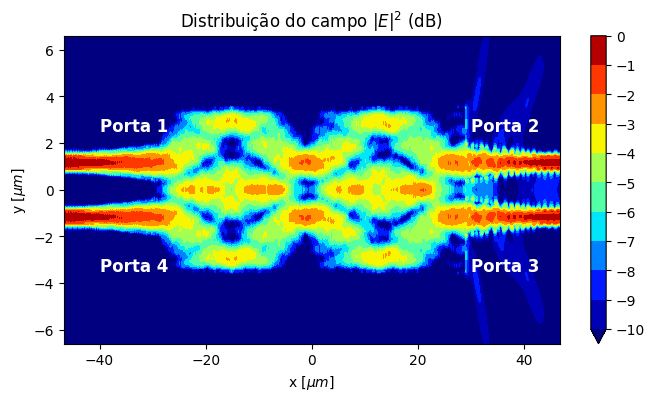

In [174]:
plt.figure()
#mycmap = plt.get_cmap('jet')

v = np.linspace(-10, 0, 11, endpoint=True)

CS = plt.contourf(x,y,10*np.log10(np.transpose(Emag[:,:,0])), v, cmap=mycmap, extend='min')
plt.colorbar(ticks=v)

plt.title('Distribuição do campo $|E|^2$ (dB)', fontsize = 12)
plt.ylabel(r'y $[\mu m]$', fontsize = 10)
plt.xlabel(r'x $[\mu m]$', fontsize = 10)

plt.text(-40,2.5, 'Porta 1', fontsize = 12, fontweight = 'bold', color='w')
plt.text(-40,-3.5, 'Porta 4', fontsize = 12, fontweight = 'bold', color='w')
plt.text(30,2.5,'Porta 2', fontsize = 12, fontweight = 'bold', color='w')
plt.text(30,-3.5,'Porta 3', fontsize = 12, fontweight = 'bold', color='w')
plt.savefig('VAR Distribuição do campo E (db)')

Transimitance

In [175]:
print(varApi.getresult('input profile 1', 'T'))

{'lambda': array([[1.57500000e-06],
       [1.56088020e-06],
       [1.54701131e-06],
       [1.53338671e-06],
       [1.52000000e-06]]), 'f': array([[1.90344418e+14],
       [1.92066283e+14],
       [1.93788149e+14],
       [1.95510015e+14],
       [1.97231880e+14]]), 'T': array([-0.00354483, -0.00031564, -0.00444268, -0.00125058, -0.00058102]), 'Lumerical_dataset': {'parameters': [['lambda', 'f']], 'attributes': ['T']}}


In [176]:
Tin   = varApi.getresult('input profile 1', 'T')
Tout2 = varApi.getresult('output profile port 2', 'T')
Tout3 = varApi.getresult('output profile port 3', 'T')
T = varApi.transmission('input profile 1')
T1 = np.abs(Tin['T'])**2
T2 = np.abs(Tout2['T'])**2
T3 = np.abs(Tout3['T'])**2

T1_dB = 10*np.log10(T1)
T2_dB = 10*np.log10(T2)
T3_dB = 10*np.log10(T3)

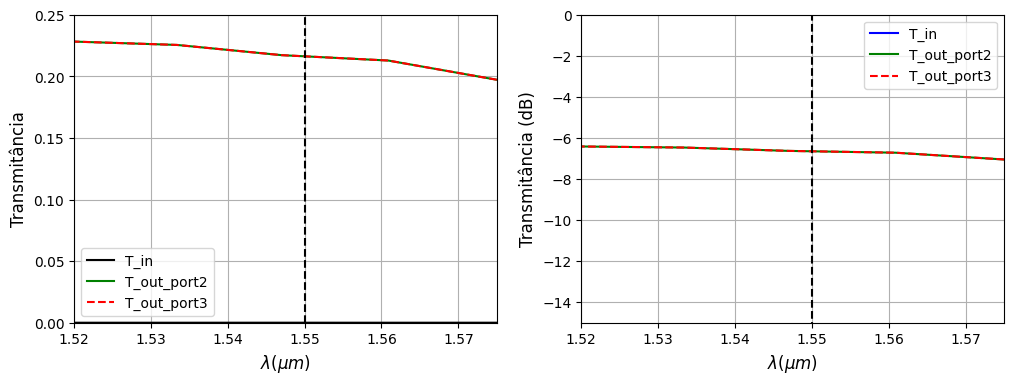

In [179]:
fig, axs = plt.subplots(1,2, figsize = (12,4))

axs[0].plot(Tin['lambda']/um, T1, 'black', lw=1.5, label='T_in')
axs[0].plot(Tin['lambda']/um, T2, 'g', lw=1.5, label='T_out_port2')
axs[0].plot(Tin['lambda']/um, T3, 'r--', lw=1.5, label='T_out_port3')
axs[0].plot(1.55*np.ones(5), np.linspace(0,0.3,5), lw=1.5, linestyle='--', color='k')
axs[0].set_xlabel(r'$\lambda (\mu m)$', fontsize = 12)
axs[0].set_ylabel('Transmitância', fontsize = 12)
axs[0].set_xlim([wl_start/um,wl_stop/um])
axs[0].set_ylim([0,0.25])
axs[0].legend()
axs[0].grid(True)

axs[1].plot(Tin['lambda']/um, T1_dB, 'b', lw=1.5, label='T_in')
axs[1].plot(Tin['lambda']/um, T2_dB, 'g', lw=1.5, label='T_out_port2')
axs[1].plot(Tin['lambda']/um, T3_dB, 'r--', lw=1.5, label='T_out_port3')
axs[1].plot(1.55*np.ones(5), np.linspace(-30,0.075,5), lw=1.5, linestyle='--', color='k')
axs[1].set_xlabel(r'$\lambda (\mu m)$', fontsize = 12)
axs[1].set_ylabel('Transmitância (dB)', fontsize = 12)
axs[1].set_xlim([wl_start/um,wl_stop/um])
axs[1].set_ylim([-15, 0])
axs[1].legend()
axs[1].grid(True)
plt.savefig('VAR - Transmitância TE')

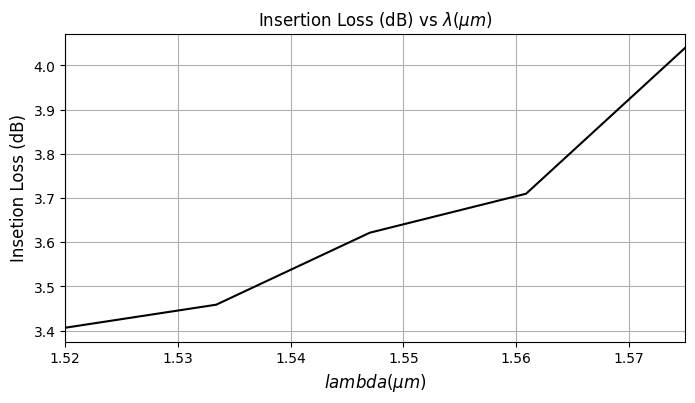

In [180]:
Il = -10*np.log10(T2 + T3)
plt.plot(Tin['lambda']/um, Il, 'black', lw=1.5)
plt.xlabel(r'$\lambda (\mu m)$', fontsize = 12)
plt.ylabel('Insetion Loss (dB)', fontsize = 12)
plt.title('Insertion Loss (dB) vs $\lambda (\mu m)$', fontsize = 12)
plt.xlim([wl_start/um,wl_stop/um])
plt.grid()
plt.savefig('VAR insertion loss varfdtd TE mode')


Setup to export S params    

TM simulation

In [143]:
varApi.switchtolayout()

In [144]:
#boundary conditions
varApi.set('x min bc', 'PML')
varApi.set('x max bc', 'PML')
varApi.set('y min bc', 'PML')
varApi.set('y max bc', 'PML')
varApi.set('z min bc', 'Anti-Symmetric')
varApi.set('z max bc', 'PML')
#test points
test_points= np.array([[-L/2-taper_length/2, Wm*0.6], [-L/2-taper_length/2, -Wm*0.6] , [L*0.4, -Wm/6], [L*0.4, Wm/6]])
varApi.set('mesh accuracy', 2)
varApi.set('x0', -(L/2))
varApi.set('test points', test_points)

'''#more stability 
varApi.set('dt stability factor', 0.9)
#custom PML setup
varApi.set('PML type', 'stretched coordinate PML')
varApi.set('PML profile', 4)
varApi.set('PML layers', 40)
varApi.set('PML kappa', 10)
varApi.set('PML sigma', 1)
varApi.set('PML alpha', 10)'''

"#more stability \nvarApi.set('dt stability factor', 0.9)\n#custom PML setup\nvarApi.set('PML type', 'stretched coordinate PML')\nvarApi.set('PML profile', 4)\nvarApi.set('PML layers', 40)\nvarApi.set('PML kappa', 10)\nvarApi.set('PML sigma', 1)\nvarApi.set('PML alpha', 10)"

In [145]:
varApi.save('MMIvarTM')
varApi.run()

In [146]:
#field profile
E = varApi.getresult('z normal field profile', 'E')

x = E['x']
x = x[:,0]/um
y = E['y']
y = y[:,0]/um
z = E['z']  

E = E['E']

Ex = E[:,:,0,:,0]
Ey = E[:,:,0,:,1]
Ez = E[:,:,0,:,2]

Emag = np.sqrt(np.abs(Ex)**2 + np.abs(Ey)**2 + np.abs(Ez)**2)

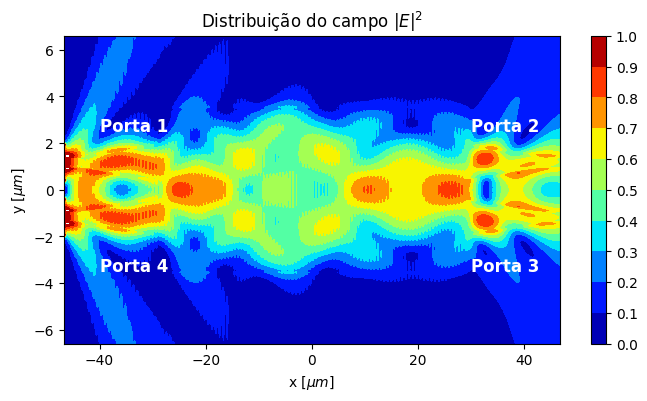

In [147]:
plt.figure()
mycmap = plt.get_cmap('jet')

v = np.linspace(0, 1, 11, endpoint=True)

plt.contourf(x,y,np.transpose(Emag[:,:,0]), v, cmap=mycmap)
plt.colorbar(ticks=v)
plt.title(r'Distribuição do campo $|E|^2$', fontsize = 12)
plt.ylabel(r'y $[\mu m]$', fontsize = 10)
plt.xlabel(r'x $[\mu m]$', fontsize = 10)

plt.text(-40,2.5, 'Porta 1', fontsize = 12, fontweight = 'bold', color='w')
plt.text(-40,-3.5, 'Porta 4', fontsize = 12, fontweight = 'bold', color='w')
plt.text(30,2.5,'Porta 2', fontsize = 12, fontweight = 'bold', color='w')
plt.text(30,-3.5,'Porta 3', fontsize = 12, fontweight = 'bold', color='w')
plt.savefig('VAR - field TM mode')

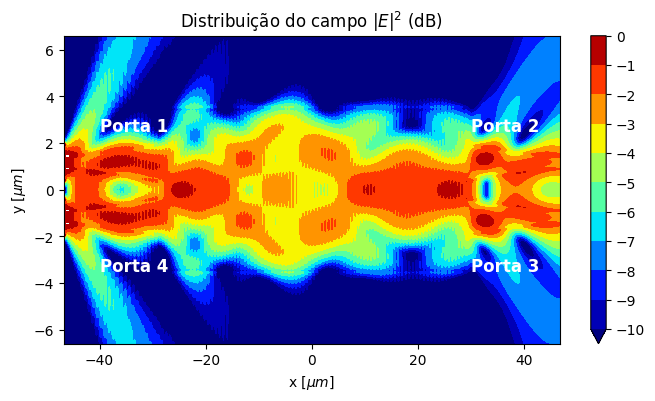

In [148]:
plt.figure()
#mycmap = plt.get_cmap('jet')

v = np.linspace(-10, 0, 11, endpoint=True)

CS = plt.contourf(x,y,10*np.log10(np.transpose(Emag[:,:,0])), v, cmap=mycmap, extend='min')
plt.colorbar(ticks=v)

plt.title(r'Distribuição do campo $|E|^2$ (dB)', fontsize = 12)
plt.ylabel(r'y $[\mu m]$', fontsize = 10)
plt.xlabel(r'x $[\mu m]$', fontsize = 10)

plt.text(-40,2.5, 'Porta 1', fontsize = 12, fontweight = 'bold', color='w')
plt.text(-40,-3.5, 'Porta 4', fontsize = 12, fontweight = 'bold', color='w')
plt.text(30,2.5,'Porta 2', fontsize = 12, fontweight = 'bold', color='w')
plt.text(30,-3.5,'Porta 3', fontsize = 12, fontweight = 'bold', color='w')
plt.savefig('VAR - field TM mode db')

In [149]:
Tin   = varApi.getresult('input profile 1', 'T')
Tout2 = varApi.getresult('output profile port 2', 'T')
Tout3 = varApi.getresult('output profile port 3', 'T')

T1 = np.abs(Tin['T'])**2
T2 = np.abs(Tout2['T'])**2
T3 = np.abs(Tout3['T'])**2

T1_dB = 10*np.log10(T1)
T2_dB = 10*np.log10(T2)
T3_dB = 10*np.log10(T3)

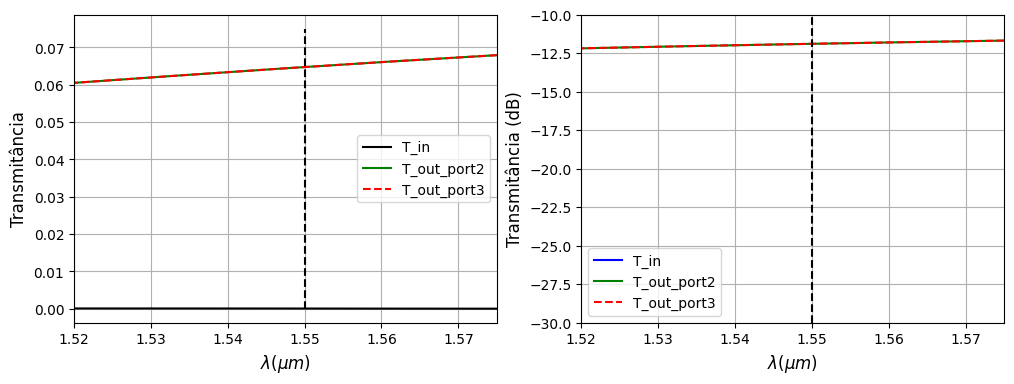

In [150]:
fig, axs = plt.subplots(1,2, figsize = (12,4))

axs[0].plot(Tin['lambda']/um, T1, 'black', lw=1.5, label='T_in')
axs[0].plot(Tin['lambda']/um, T2, 'g', lw=1.5, label='T_out_port2')
axs[0].plot(Tin['lambda']/um, T3, 'r--', lw=1.5, label='T_out_port3')
axs[0].plot(1.55*np.ones(5), np.linspace(0,0.075,5), lw=1.5, linestyle='--', color='k')
axs[0].set_xlabel(r'$\lambda (\mu m)$', fontsize = 12)
axs[0].set_ylabel('Transmitância', fontsize = 12)
axs[0].set_xlim([wl_start/um,wl_stop/um])
#axs[0].set_ylim([0,0.55])
axs[0].legend()
axs[0].grid(True)

axs[1].plot(Tin['lambda']/um, T1_dB, 'b', lw=1.5, label='T_in')
axs[1].plot(Tin['lambda']/um, T2_dB, 'g', lw=1.5, label='T_out_port2')
axs[1].plot(Tin['lambda']/um, T3_dB, 'r--', lw=1.5, label='T_out_port3')
axs[1].plot(1.55*np.ones(5), np.linspace(-30,0.075,5), lw=1.5, linestyle='--', color='k')
axs[1].set_xlabel(r'$\lambda (\mu m)$', fontsize = 12)
axs[1].set_ylabel('Transmitância (dB)', fontsize = 12)
axs[1].set_xlim([wl_start/um,wl_stop/um])
axs[1].set_ylim([-30,-10])
axs[1].legend()
axs[1].grid(True)
plt.savefig('VAR - transmitancia TM mode')

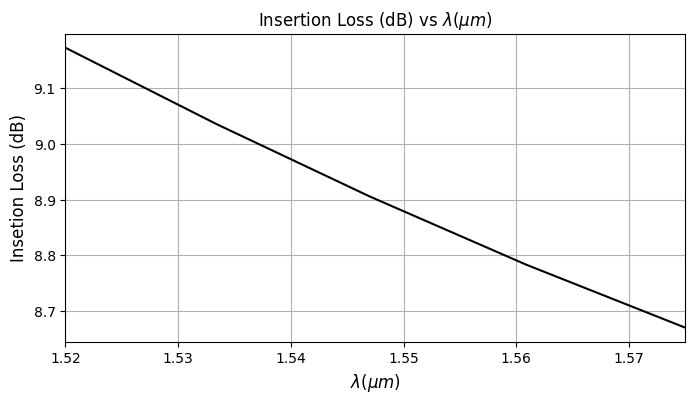

In [151]:
Il = -10*np.log10(T2 + T3)
plt.plot(Tin['lambda']/um, Il, 'black', lw=1.5)
plt.xlabel(r'$\lambda (\mu m)$', fontsize = 12)
plt.ylabel('Insetion Loss (dB)', fontsize = 12)
plt.title(r'Insertion Loss (dB) vs $\lambda (\mu m)$', fontsize = 12)
plt.xlim([wl_start/um,wl_stop/um])
plt.grid()
plt.savefig('VAR - insertion loss varfdtd TM mode')


In [ ]:
varApi.switchtolayout()
varApi.close()